In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
 

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')




In [17]:
import seaborn as sns


In [18]:
# from google.colab import files
# frist_data = files.upload()
# second_data = files.upload()

In [24]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")


In [25]:
calories.head()

,user_ID,calories
0,1,250
1,2,300
2,3,280
3,4,400
4,5,350


In [26]:
exercise.head()

,user_ID,gender,age,height,weight,duration,heart_rate,body_temp
0,1,Male,25,175,70,30,70,36.5
1,2,Female,30,160,55,45,143,37.9
2,3,Male,22,180,80,20,131,36.9
3,4,Female,35,165,60,60,98,38.4
4,5,Male,40,170,75,50,84,36.6


In [27]:
exercise_df = exercise.merge(calories, on="user_ID")
exercise_df.head()

,user_ID,gender,age,height,weight,duration,heart_rate,body_temp,calories
0,1,Male,25,175,70,30,70,36.5,250
1,2,Female,30,160,55,45,143,37.9,300
2,3,Male,22,180,80,20,131,36.9,280
3,4,Female,35,165,60,60,98,38.4,400
4,5,Male,40,170,75,50,84,36.6,350


In [28]:
print("this dataset has",exercise_df.shape[0],"instance and ",exercise_df.shape[1],"columns")

this dataset has 10 instance and  9 columns


In [29]:
exercise_df.columns

Index(['user_ID', 'gender', 'age', 'height', 'weight', 'duration',
       'heart_rate', 'body_temp', 'calories'],
      dtype='object')

In [30]:
print("columns : ")
for i , column in zip(range(len(exercise_df)),exercise_df.columns):
    print("/t",i+1 , "." , column)
    

columns : 
/t 1 . user_ID
/t 2 . gender
/t 3 . age
/t 4 . height
/t 5 . weight
/t 6 . duration
/t 7 . heart_rate
/t 8 . body_temp
/t 9 . calories


In [31]:
exercise_df.describe()

,user_ID,age,height,weight,duration,heart_rate,body_temp,calories
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,31.300000,169.700000,67.600000,39.000000,112.800000,37.270000,341.500000
std,3.02765,6.992853,8.654479,14.338759,13.291601,28.797376,0.742443,82.867029
min,1.00000,22.000000,158.000000,50.000000,20.000000,70.000000,36.300000,250.000000
25%,3.25000,27.250000,162.750000,55.750000,30.000000,88.250000,36.675000,282.500000
50%,5.50000,29.500000,168.500000,65.000000,37.500000,110.000000,37.050000,310.000000
75%,7.75000,34.250000,177.250000,78.750000,48.750000,140.000000,37.975000,387.500000
max,10.00000,45.000000,182.000000,90.000000,60.000000,149.000000,38.400000,500.000000


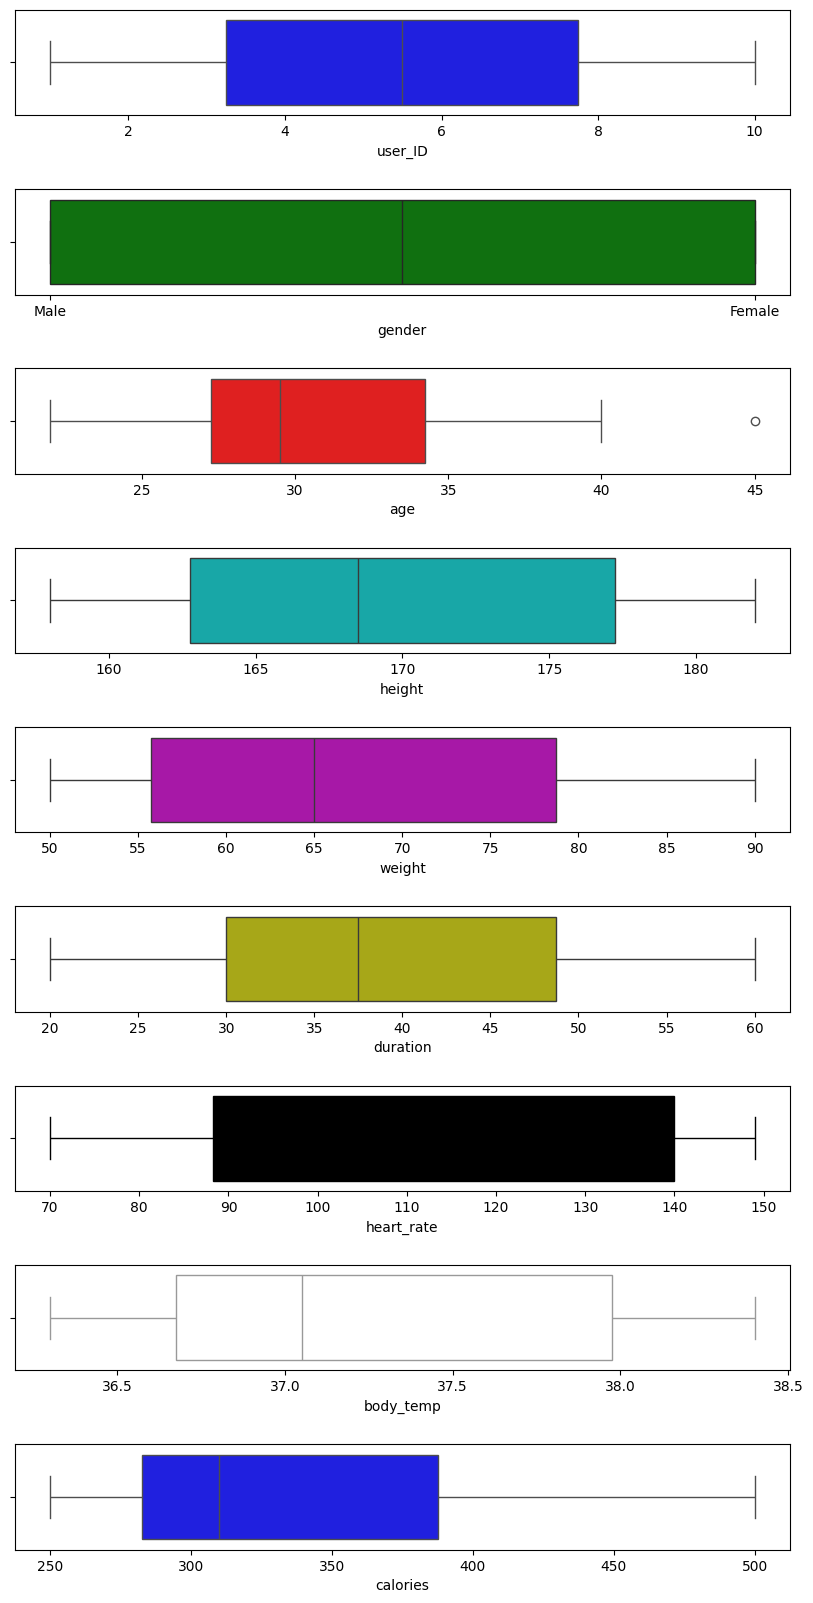

In [32]:
c=['b','g','r','c','m','y','k','w','b']
fig1 , axes = plt.subplots(len(exercise_df.columns), 1 , figsize = (10,20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()
for i , column in zip(range(len(exercise_df.columns)),exercise_df.columns):
    try:
        sns.boxplot(data = exercise_df , x = column ,color = c[i],ax = axes[i])
    except:
        fig1.delaxes(axes[i])
        continue    

In [33]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_ID     10 non-null     int64  
 1   gender      10 non-null     object 
 2   age         10 non-null     int64  
 3   height      10 non-null     int64  
 4   weight      10 non-null     int64  
 5   duration    10 non-null     int64  
 6   heart_rate  10 non-null     int64  
 7   body_temp   10 non-null     float64
 8   calories    10 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 852.0+ bytes


<Axes: >

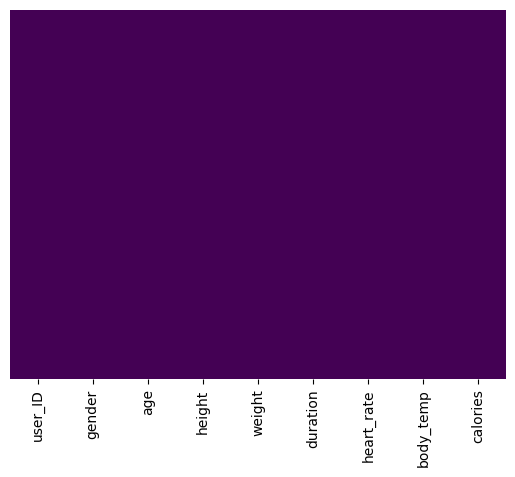

In [34]:
sns.heatmap(exercise_df.isnull(), yticklabels = False , cbar=False,cmap="viridis" )